# TASK - 1

# TITANIC SURVIVAL PREDICTION

#### Importing basic libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [4]:
df = pd.read_csv("C:\\Users\\Arti Rajawat\\Downloads\\archive\\tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### expose the dataset

In [5]:
df.shape

(418, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Check unique values in dataset

In [7]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

## See the numbers of Survived and not survived people

In [8]:
print((df['Survived'] == 1).sum())

print((df['Survived'] == 0).sum())

152
266


### check how many types of class in ship

In [9]:
different_class=df['Pclass'].value_counts()
different_class

3    218
1    107
2     93
Name: Pclass, dtype: int64

## Check which class passanger survived more in terms of life saving

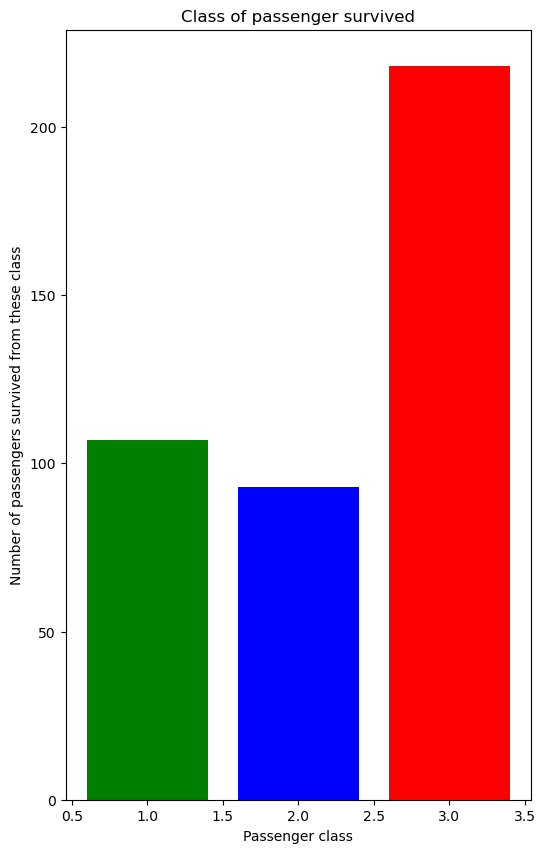

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 10))
plt.xlabel("Passenger class")
plt.ylabel("Number of passengers survived from these class")
plt.title("Class of passenger survived")


# Plot the bar chart with the specified colors
plt.bar(different_class.keys(), different_class.values, color=['red', 'green', 'blue'])

plt.show()


### classify the passangers by dividing in different age group

In [11]:
diffrent_age_group = df['Age'].value_counts()
diffrent_age_group

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

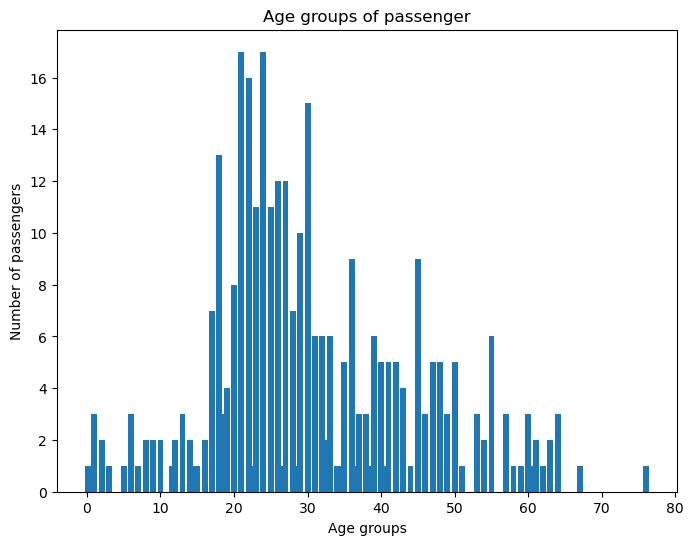

In [12]:
plt.figure(figsize=(8,6))
plt.xlabel("Age groups")
plt.ylabel("Number of passengers")
plt.title("Age groups of passenger")
plt.bar(diffrent_age_group.keys(),df['Age'].value_counts().values)
plt.show()

### Use bar chart to show the Survived passengers based on their age group

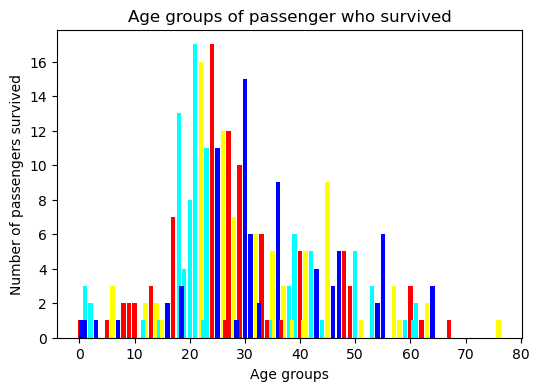

In [13]:
plt.figure(figsize=(6,4))
plt.xlabel("Age groups")
plt.ylabel("Number of passengers survived")
plt.title("Age groups of passenger who survived")
plt.bar(df['Age'].value_counts().keys(),df['Age'].value_counts().values, color=['cyan','red','yellow','blue'])
plt.show()

## Use bar chart to show the died passengers based on their age group

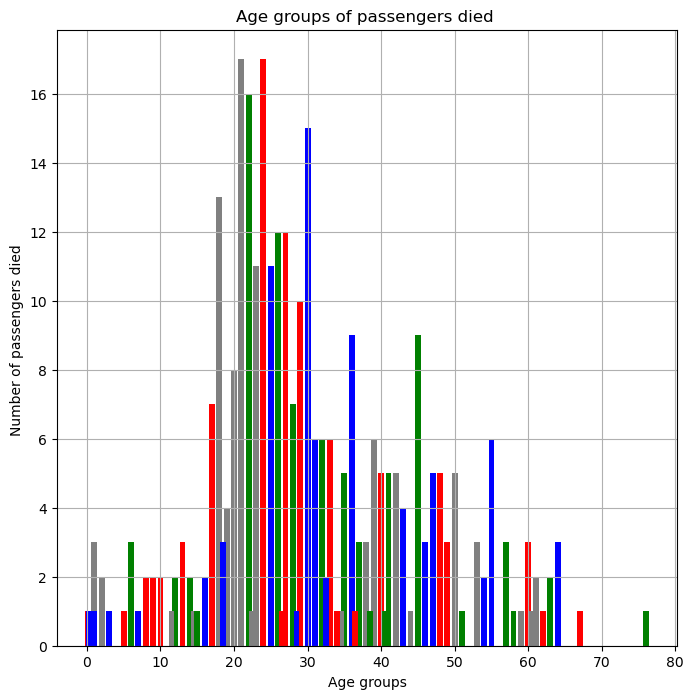

In [14]:
plt.figure(figsize=(8,8))
plt.xlabel("Age groups")
plt.ylabel("Number of passengers died ")
plt.title("Age groups of passengers died ")
plt.bar(df['Age'].value_counts().keys(),df['Age'].value_counts().values, color=['grey','red','green','blue'])
plt.grid()
plt.show()

In [15]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

## Used a pie chart to show the Passengers and their town

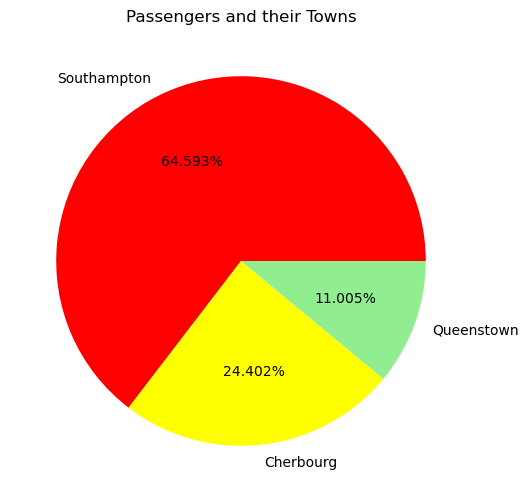

In [16]:
plt.figure(figsize=(6,6))
plt.title('Passengers and their Towns')
#shadow=True
plt.pie(df['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.03f%%', colors=['red','yellow','lightgreen'])
plt.show()

## Used a pie chart to show the died persons according their town

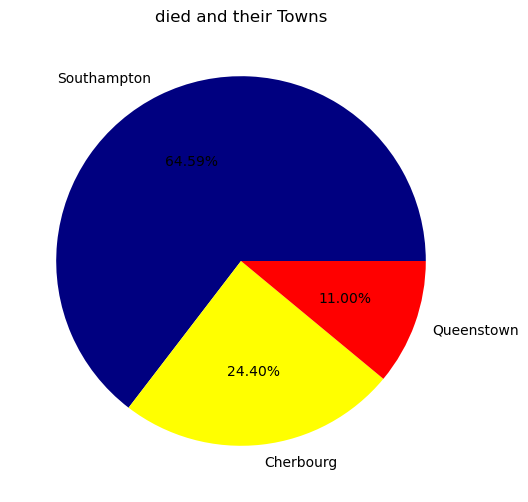

In [17]:
plt.figure(figsize=(6,6))
plt.title('died and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(df['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['navy','yellow','red'])
plt.show()

## Used a pie chart to show the Survived persons according their town

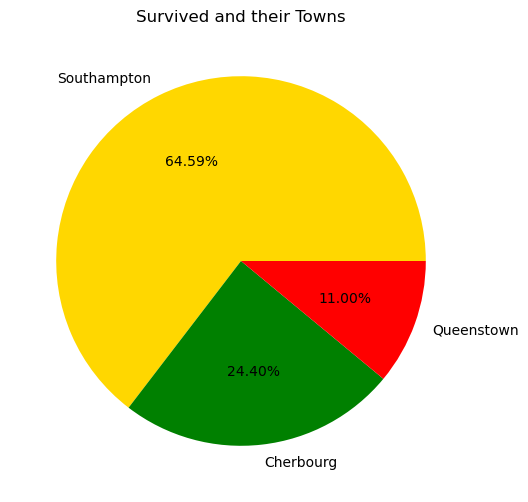

In [18]:
plt.figure(figsize=(6,6))
plt.title('Survived and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(df['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'],autopct ='%1.02f%%', colors=['gold','green','red'])
plt.show()

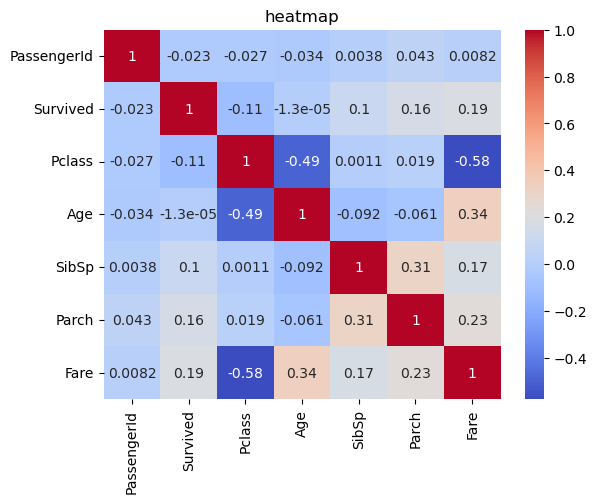

In [19]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("heatmap")
plt.show()

In [20]:
from pycaret.regression import*

In [ ]:
reg_setup = setup(data=df,target='Survived',session_id=123)
best_model=compare_models()
print(best_model)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Regression
3,Original data shape,"(418, 12)"
4,Transformed data shape,"(418, 14)"
5,Transformed train set shape,"(292, 14)"
6,Transformed test set shape,"(126, 14)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:17:17
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0001,0.0000,5.4720
dt,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0001,0.0000,8.0650
lr,Linear Regression,0.0079,0.0001,0.0081,0.9997,0.0060,0.0103,9.2050
br,Bayesian Ridge,0.0079,0.0001,0.0081,0.9997,0.0060,0.0103,4.7540
ridge,Ridge Regression,0.0211,0.0005,0.0220,0.9979,0.0163,0.0274,5.6510
huber,Huber Regressor,0.0657,0.0069,0.0821,0.9700,0.0628,0.0733,5.2110
omp,Orthogonal Matching Pursuit,0.4551,0.2278,0.4767,0.0073,0.3351,0.6006,7.1300
lasso,Lasso Regression,0.4579,0.2283,0.4773,0.0051,0.3359,0.6031,5.1100
llar,Lasso Least Angle Regression,0.4579,0.2283,0.4773,0.0051,0.3359,0.6031,5.4220
en,Elastic Net,0.4571,0.2286,0.4776,0.0036,0.3359,0.6033,5.3140


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report


In [31]:
# Convert categorical features into numerical representations
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Split the data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Model training and evaluation

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



## Model achieved a perfect accuracy of 100% on the test data, with precision, recall, and F1-score of 100% for both classes (0 and 1).
## Overall accuracy and average metrics (precision, recall, F1-score) for the model on the test data are all 100%.